**<H1>Versuch 366: Prismen-Spektralapparat</H1>**

In [1]:
import sys
import os
import sympy as sp
import numpy as np

# Add the correct path to the P2 folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from scientific_error_rounder import runden_und_speichern
from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from gauss_fehlerfortpflanzung import gaussian_error_propagation
from geraden_fit import geraden_fit
from mean_calc_w_err import err_weighted_mean
from data_handler import add_column_to_file
from geraden_fit_config import config_1

<H2>Versuchsteil 1: Ausrichten und Vermessen</H2>

**<H4>366.a:** Apperturmessung</H4>

Die Appertur wurde auf $Appertur \pm \Delta Appertur = (0.5 \pm 0.3) \, mm$ bestimmt.

Die Linsenbreite beträgt $b_{Linse} \pm \Delta b_{Linse} = (1.6 \pm 0.3) \, cm$

**<H4>366.b:** Messung der Nullage $\alpha_0$ und der dem Winkel $\gamma$ der brechenden Kante</H4>

In [19]:
# Nullage:
alpha_0=(358.5+15/60)-360
err_alpha_0=0.04

print(f'Die Nullage liegt bei ({alpha_0} ± {err_alpha_0})°')

Die Nullage liegt bei (-1.25 ± 0.04)°


In [25]:
# Winkel der brechenden Kante:

var_names=[a1, a2, a0]=sp.symbols('a1 a2 a0')
formula=1/2*((a1-a0)-(a2-a0)) #a0 hier irrelevant
gaussian_error_propagation(formula, ((a1,63.15,0.04),(a2,-56.73,0.04),(a0,-1.25,0.04)))

Formel: 0.5*a1 - 0.5*a2
Werte: ((a1, 63.15, 0.04), (a2, -56.73, 0.04), (a0, -1.25, 0.04)) 

Formelwert: 59.9400000000000

Fehlerformel: sqrt((0.5*del_a1)**2 + (-0.5*del_a2)**2 + (0)**2)
Fehler: 0.0282842712474619 
Ergebnis: 59.94±0.03
Das Ergebnis hat eine Genauigkeit von 0.05%


**<H4>366.c:** Erstellung der Kalibrationskurve</H4>

In [ ]:
# Es muss nun 1/D_B für den Plot bestimmt werden
# var_names=[l, el, a, ea]=sp.symbols('l el a ea')
# formula_list=[
#     l,
# 	el,
# 	a,
# 	ea
#     ]
# evaluate_gaussian_error('c_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['lambda [nm]','err_lambda [nm]', 'alpha [deg]', 'err_alpha [deg]'], output_file_suffix='calc')

sqrt((del_l)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (del_el)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (del_a)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_ea)**2)
Zeile 1: [404.66, 0.0, 0.0, 0.0, 52.3, 0.0, 0.05, 0.0]
Zeile 2: [435.83, 0.0, 0.0, 0.0, 51.4, 0.0, 0.05, 0.0]
Zeile 3: [467.81, 0.0, 0.0, 0.0, 50.7333333333, 0.0, 0.05, 0.0]
Zeile 4: [479.99, 0.0, 0.0, 0.0, 50.55, 0.0, 0.05, 0.0]
Zeile 5: [508.58, 0.0, 0.0, 0.0, 50.1, 0.0, 0.05, 0.0]
Zeile 6: [546.08, 0.0, 0.0, 0.0, 49.6666666667, 0.0, 0.05, 0.0]
Zeile 7: [576.96, 0.0, 0.0, 0.0, 49.3333333333, 0.0, 0.05, 0.0]
Zeile 8: [579.06, 0.0, 0.0, 0.0, 49.2833333333, 0.0, 0.05, 0.0]
Zeile 9: [643.85, 0.0, 0.0, 0.0, 48.8666666667, 0.0, 0.05, 0.0]
Auswertung abgeschlossen. Ergebnisse wurden in 'c_mess_calc.csv' gespeichert.


In [42]:
runden_und_speichern('c_mess_calc.csv')

Die gerundeten Daten wurden in der CSV-Datei "c_mess_calc_rounded.csv" gespeichert.


In [58]:
# Es muss nun 1/D_B für den Plot bestimmt werden
var_names=[l, a]=sp.symbols('l a')
formula_list=[
    a,
	l
    ]
evaluate_gaussian_error('c_mess_calc_rounded.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['delta [deg]', 'lambda [nm]'], output_file_suffix='plot')

sqrt((0)**2 + (del_a)**2)
sqrt((del_l)**2 + (0)**2)
Zeile 1: [52.3, 0.05, 404.66, 0.0]
Zeile 2: [51.4, 0.05, 435.83, 0.0]
Zeile 3: [50.73, 0.05, 467.81, 0.0]
Zeile 4: [50.55, 0.05, 479.99, 0.0]
Zeile 5: [50.1, 0.05, 508.58, 0.0]
Zeile 6: [49.67, 0.05, 546.08, 0.0]
Zeile 7: [49.33, 0.05, 576.96, 0.0]
Zeile 8: [49.28, 0.05, 579.06, 0.0]
Zeile 9: [48.87, 0.05, 643.85, 0.0]
Auswertung abgeschlossen. Ergebnisse wurden in 'c_mess_calc_rounded_plot.csv' gespeichert.


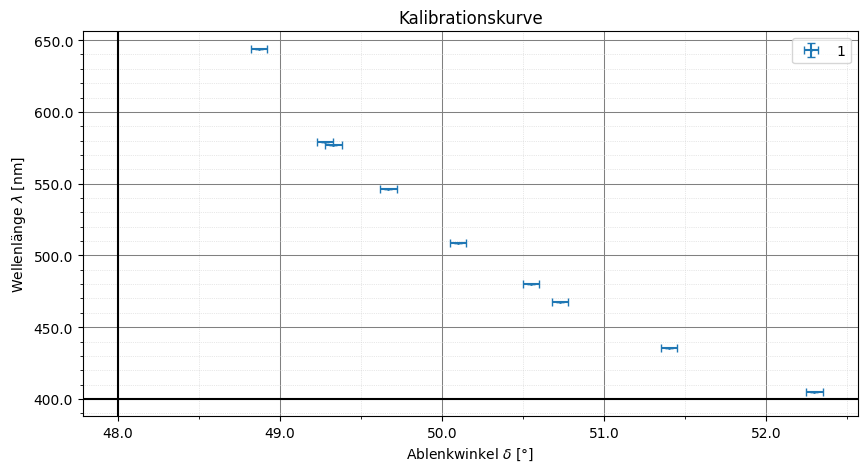

In [ ]:
geraden_fit('c_mess_calc_rounded_plot.csv', title='Kalibrationskurve', y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			save=False, linear_fit=False, focus_point=False, plot_y_inter=False, legendlocation='best', y_axis=48, x_axis=400,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5)

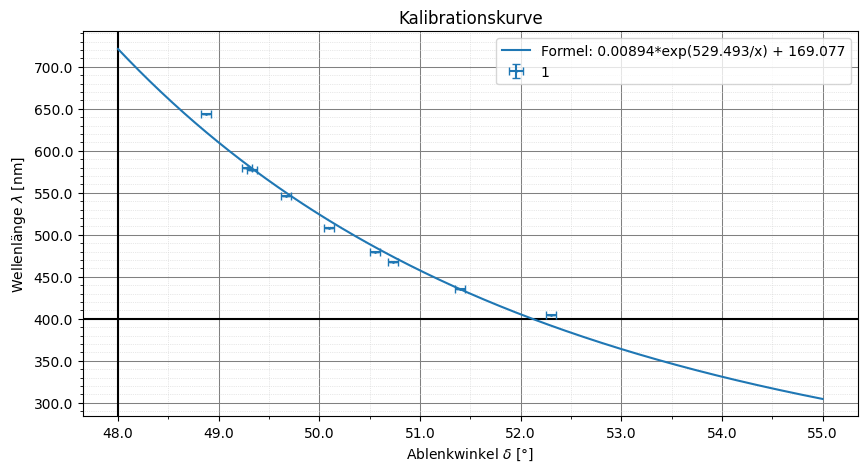

In [ ]:
# Definiere die Symbole für die Formel
a, b, c, x = sp.symbols('a b c x')
var_names = [a, b, c, x]

# Definiere die Formel
formula = [a*sp.exp(b/x)+c]

# Definiere die Werte für die Variablen
values = [0.00894,529.493,169.077]

# Erstelle eine angepasste Konfiguration
config = config_1
config.plot_formula = True
config.formula = formula
config.var_names = var_names
config.formula_values = values
config.formula_x_range = (48, 55)

# Führe geraden_fit mit der angepassten Konfiguration aus
geraden_fit('c_mess_calc_rounded_plot.csv', config, plot_formula=True, title='Kalibrationskurve', y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			 y_axis=48, x_axis=400, linear_fit=False, focus_point=False,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5, save=True, )

Diese fit-Kurve besitzt eine Standardabweichung von $\sigma \approx 9,327$

<H2>Versuchsteil 2: Bestimmung eines unbekannten Elements</H2>

**<H4>366.d:** Lampe 5</H4>

In [8]:
# Winkelrechnung Lampe 5
var_names=[a1, a2]=sp.symbols('a1 a2')
formula_list=[
    360-(a1+a2/60)
    ]
evaluate_gaussian_error('d_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['delta [deg]'], output_file_suffix='calc')
runden_und_speichern('d_mess_calc.csv')

sqrt((-del_a1)**2 + (-del_a2/60)**2)
Zeile 1: [48.8166666667, 0.05]
Zeile 2: [50.0666666667, 0.05]
Zeile 3: [50.45, 0.05]
Zeile 4: [50.7333333333, 0.05]
Zeile 5: [51.25, 0.05]
Auswertung abgeschlossen. Ergebnisse wurden in 'd_mess_calc.csv' gespeichert.
Die gerundeten Daten wurden in der CSV-Datei "d_mess_calc_rounded.csv" gespeichert.
